In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split as split
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
import warnings

In [2]:
df = pd.read_pickle('df.pk2')

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,a,b,c,Transported,Cbin
4277,0,1,0,149,2,39,0,0,0,0,0,0,5252,1,0,0,0,0
4278,1,0,0,2184,2,24,0,109,9,25,458,47,4502,5,0,1,1,0
4279,2,1,0,1,2,58,1,43,1222,0,1285,52,457,0,0,1,0,0
4280,3,1,0,1,2,33,0,0,816,335,1143,191,7149,0,0,1,0,0
4281,4,0,0,3423,2,16,0,277,69,149,472,3,8319,5,1,1,1,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8693 entries, 4277 to 12969
Data columns (total 18 columns):
 #   Column        Non-Null Count  Dtype
---  ------        --------------  -----
 0   PassengerId   8693 non-null   int64
 1   HomePlanet    8693 non-null   int32
 2   CryoSleep     8693 non-null   int64
 3   Cabin         8693 non-null   int32
 4   Destination   8693 non-null   int32
 5   Age           8693 non-null   int64
 6   VIP           8693 non-null   int64
 7   RoomService   8693 non-null   int64
 8   FoodCourt     8693 non-null   int64
 9   ShoppingMall  8693 non-null   int64
 10  Spa           8693 non-null   int64
 11  VRDeck        8693 non-null   int64
 12  Name          8693 non-null   int32
 13  a             8693 non-null   int32
 14  b             8693 non-null   int32
 15  c             8693 non-null   int32
 16  Transported   8693 non-null   int64
 17  Cbin          8693 non-null   int32
dtypes: int32(8), int64(10)
memory usage: 1018.7 KB


In [5]:
df.iloc[708]

PassengerId      708
HomePlanet         0
CryoSleep          1
Cabin           4729
Destination        2
Age               14
VIP                0
RoomService        0
FoodCourt          0
ShoppingMall       0
Spa                0
VRDeck             0
Name            5064
a                  6
b                124
c                  1
Transported        1
Cbin               1
Name: 4985, dtype: int64

In [7]:
df.corr()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,a,b,c,Transported,Cbin
PassengerId,1.000000,-0.004449,-0.000663,-0.072898,-0.002605,-0.009621,0.014951,-0.004763,0.003928,0.010344,0.006074,0.007868,-0.001820,-0.010406,-0.230916,-0.017117,0.021775,-0.000663
HomePlanet,-0.004449,1.000000,0.068726,-0.425518,0.042618,0.123409,0.044255,0.220152,0.031021,0.098814,0.017481,-0.011144,0.027138,-0.347563,0.007214,0.006099,0.107755,0.068726
CryoSleep,-0.000663,0.068726,1.000000,0.100614,-0.085571,-0.069170,-0.023407,-0.303519,-0.303330,-0.287537,-0.301797,-0.301388,-0.001247,0.021737,0.003314,0.020462,0.404716,1.000000
Cabin,-0.072898,-0.425518,0.100614,1.000000,0.113267,-0.237408,-0.053248,-0.071020,-0.313882,-0.050569,-0.210863,-0.236105,0.013837,0.912338,0.261996,0.084562,-0.052508,0.100614
Destination,-0.002605,0.042618,-0.085571,0.113267,1.000000,-0.004440,-0.024905,0.076886,-0.082343,0.050396,-0.031445,-0.059033,0.001358,0.166499,-0.018245,-0.015758,-0.104817,-0.085571
Age,-0.009621,0.123409,-0.069170,-0.237408,-0.004440,1.000000,0.034114,0.090856,0.182239,0.065247,0.151813,0.135085,-0.015796,-0.230049,-0.000449,0.012225,-0.073685,-0.069170
VIP,0.014951,0.044255,-0.023407,-0.053248,-0.024905,0.034114,1.000000,0.031860,0.056535,-0.003855,0.036589,0.048129,-0.010661,-0.060580,0.001273,0.005636,-0.014260,-0.023407
RoomService,-0.004763,0.220152,-0.303519,-0.071020,0.076886,0.090856,0.031860,1.000000,-0.037929,0.125866,-0.015270,-0.032185,0.022988,0.011879,0.003286,-0.017963,-0.312680,-0.303519
FoodCourt,0.003928,0.031021,-0.303330,-0.313882,-0.082343,0.182239,0.056535,-0.037929,1.000000,-0.021545,0.314349,0.341977,-0.028818,-0.351295,0.007235,0.017135,-0.019618,-0.303330
ShoppingMall,0.010344,0.098814,-0.287537,-0.050569,0.050396,0.065247,-0.003855,0.125866,-0.021545,1.000000,-0.008234,-0.028611,-0.002954,0.018110,-0.011425,-0.021472,-0.047513,-0.287537


<AxesSubplot:>

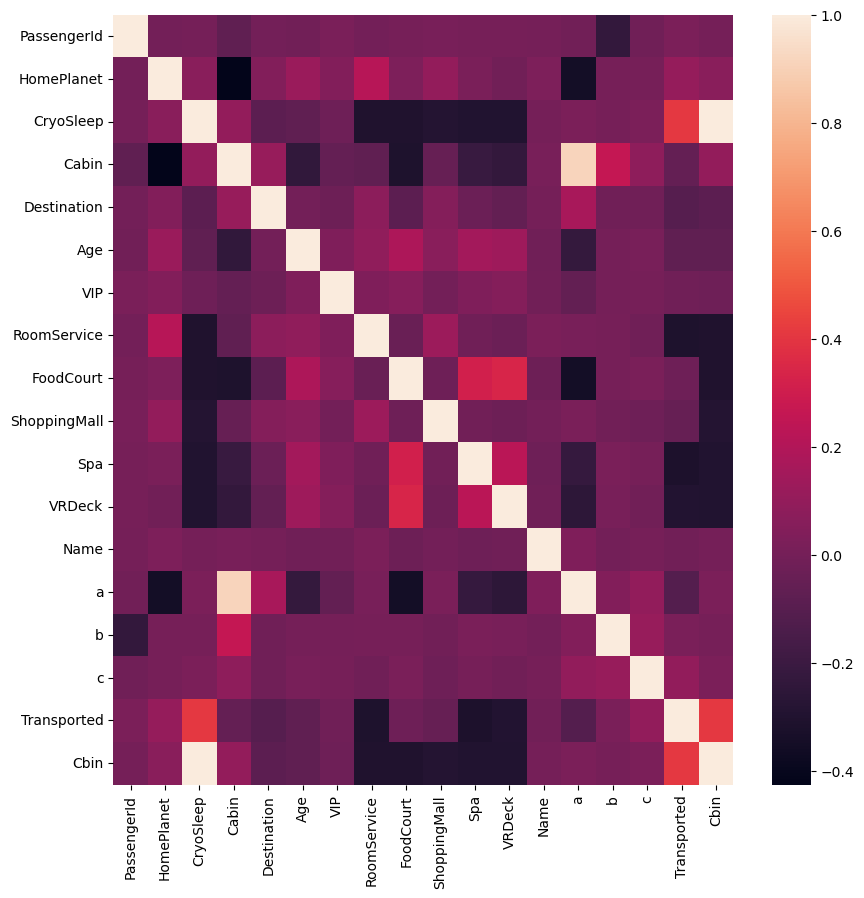

In [8]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr())


In [14]:
X = df.iloc[:,:-1]
y = df.iloc[:,-1]

In [15]:
from sklearn.model_selection import train_test_split


In [16]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.3, random_state = 47)

In [17]:
y_train.value_counts()

0    3819
1    2111
2     155
Name: Cbin, dtype: int64

In [18]:
###################################################
# Scale the features to standard scaler, so we could use them easily with as much algo as possible

In [19]:
from sklearn.preprocessing import StandardScaler

In [20]:
sc = StandardScaler()

In [21]:
X_train_transformed = pd.DataFrame(sc.fit_transform(X_train), columns=X_train.columns, index = X_train.index)
X_train_transformed.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,a,b,c,Transported
11534,1.142167,-0.831076,-0.738161,0.848590,-0.617961,0.229036,-0.207931,-0.465055,0.674707,-0.441559,-0.467804,0.242344,0.911445,0.878257,-1.321696,0.843584,-1.006099
10282,0.645055,-0.831076,-0.738161,-0.355288,0.576162,-0.258754,-0.207931,-0.097207,-0.471911,-0.441559,-0.467804,1.992241,-1.280080,0.332207,-1.403185,0.843584,-1.006099


In [22]:
X_test_transformed = pd.DataFrame(sc.transform(X_test), columns=X_test.columns, index = X_test.index)
X_test_transformed.head(2)

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,a,b,c,Transported
10773,0.840009,0.322196,1.117151,-1.428169,0.576162,-1.025281,-0.207931,-0.465055,-0.471911,-0.441559,-0.467804,-0.454933,0.076006,-1.851994,0.007349,-1.002230,0.993938
6265,-0.949914,-0.831076,-0.738161,0.248892,0.576162,-1.373702,-0.207931,1.561578,-0.471911,-0.441559,-0.467804,-0.454933,0.613474,0.332207,0.408973,0.843584,-1.006099


In [23]:
#############################################################

In [24]:
# TRY AT HOME DIFFERENT ALGOS...

In [25]:
#  RANDOM FOREST TRY, without grid search

In [26]:
import sklearn.ensemble as se

In [27]:
cl_random_forest_before_grid = se.RandomForestClassifier()

In [28]:
cl_random_forest_before_grid.fit(X_train_transformed ,y_train)


RandomForestClassifier()

In [29]:
y_pred_random_forest_before_grid = cl_random_forest_before_grid.predict(X_train_transformed )
print(classification_report(y_true= y_train, y_pred=y_pred_random_forest_before_grid))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      3819
           1       1.00      1.00      1.00      2111
           2       1.00      1.00      1.00       155

    accuracy                           1.00      6085
   macro avg       1.00      1.00      1.00      6085
weighted avg       1.00      1.00      1.00      6085



In [30]:
y_test_random_forest_before_grid = cl_random_forest_before_grid.predict(X_test_transformed )
print(classification_report(y_true= y_test, y_pred=y_test_random_forest_before_grid))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1620
           1       1.00      1.00      1.00       926
           2       1.00      1.00      1.00        62

    accuracy                           1.00      2608
   macro avg       1.00      1.00      1.00      2608
weighted avg       1.00      1.00      1.00      2608



In [31]:
cl_random_forest_before_grid.score(X_test_transformed ,y_test)

1.0

In [32]:
# RANDOM SEARCH

In [33]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 1000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
              }
print(random_grid)
  




{'n_estimators': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4]}


In [34]:
cl_random_forest_grid = se.RandomForestClassifier()
rf_random = RandomizedSearchCV(estimator = cl_random_forest_grid , 
                               param_distributions = random_grid,
                               n_iter = 100,  #how many fits, tradeoff!! different combinations of hyperparameters
                               cv = 3, #cross-validation to estimate performance
                               verbose=2, #amount of info that will be printed during processing
                               random_state=47, 
                               n_jobs = -1)

In [35]:
# Fit the random search model
rf_random.fit(X_train_transformed, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestClassifier(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'max_depth': [10, 20, 30, 40, 50, 60,
                                                      70, 80, 90, 100, 110,
                                                      None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 120, 230, 340, 450,
                                                         560, 670, 780, 890,
                                                         1000]},
                   random_state=47, verbose=2)

In [37]:
rf_random.best_params_

{'n_estimators': 120,
 'min_samples_split': 10,
 'min_samples_leaf': 2,
 'max_features': 'auto',
 'max_depth': 80}

In [38]:
rf_random.score(X_train_transformed, y_train)

1.0

In [39]:
rf_random.score(X_test_transformed, y_test)

1.0

In [41]:
type(rf_random.best_estimator_)

sklearn.ensemble._forest.RandomForestClassifier

In [42]:
rf_random.best_estimator_.feature_importances_

array([2.08899481e-03, 3.80855332e-03, 5.66633736e-01, 8.42047523e-03,
       8.11502040e-04, 1.35563036e-02, 1.58700656e-04, 6.31745756e-02,
       8.84181253e-02, 6.26198068e-02, 8.40967679e-02, 7.63813355e-02,
       2.16352263e-03, 5.34712462e-03, 1.90109318e-03, 2.13443578e-04,
       2.02059392e-02])

In [43]:
fe = pd.Series(rf_random.best_estimator_.feature_importances_, index=X_train_transformed.columns)
fe

PassengerId     0.002089
HomePlanet      0.003809
CryoSleep       0.566634
Cabin           0.008420
Destination     0.000812
Age             0.013556
VIP             0.000159
RoomService     0.063175
FoodCourt       0.088418
ShoppingMall    0.062620
Spa             0.084097
VRDeck          0.076381
Name            0.002164
a               0.005347
b               0.001901
c               0.000213
Transported     0.020206
dtype: float64

<AxesSubplot:>

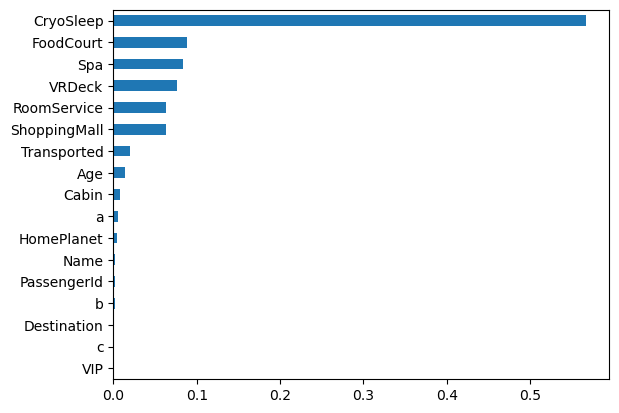

In [48]:
fe.sort_values().plot(kind='barh')